In [8]:
import numpy as np 
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import levy_stable
from scipy.stats import uniform
np.random.seed(124)
n=1000
u = np.random.uniform(low = -np.pi/2, high = np.pi/2, size = n)
np.random.seed(124)
u = np.random.uniform(low = -np.pi/2, high = np.pi/2, size = n)
w = np.random.standard_exponential(size=n)

# On définit en premier lieu les S et B pour plus de clarté
def S(alpha, beta): 
    tan_term = np.tan(np.pi * alpha / 2)**2
    result = (1 + beta**2 * tan_term)**(1 / (2 * alpha))
    return result

def B(alpha, beta):
    tan_term = beta * np.tan(np.pi * alpha / 2)
    result = 1 / alpha * np.arctan(tan_term)
    return result

def calculate_y_barre(alpha, beta, u, w):
    if alpha != 1:
        S_alpha_beta = S(alpha, beta)
        B_alpha_beta = B(alpha, beta)
        sin_alpha = np.sin(alpha)
        cos_u = np.cos(u)
        term1 = S_alpha_beta * (sin_alpha * (u + B_alpha_beta))
        term2 = (cos_u) ** (1 / alpha)
        term3 = np.cos(u - alpha * (u + B_alpha_beta)) / w
        term4 = ((1 - alpha) / alpha)
        y_barre = (term1 / term2) * np.sign(term3)* (np.abs(term3) ** term4)
    else:
        term1 = (np.pi / 2 + beta * u) * np.tan(u)
        term2 = beta * np.log((np.pi / 2) * w * np.cos(u) / (np.pi / 2 + beta * u))
        y_barre = 2 / np.pi * (term1 - term2)
    return y_barre

def transformation(alpha, beta, gamma, delta, u, w):
    y_barre = calculate_y_barre(alpha, beta, u, w)
    y = gamma * y_barre + delta
    return y

In [9]:
def prior_sample(seed):
    # Sample from prior distribution
    # For univariate alpha-stable models, sample each parameter from its respective uniform distribution
    np.random.seed(seed)
    alpha = uniform.rvs(1.1, 2)  # U[1.1, 2]
    beta = uniform.rvs(-1, 2)  # U[-1, 1]
    gamma = uniform.rvs(0, 300)  # U[0, 300]
    delta = uniform.rvs(-300, 600)  # U[-300, 300]
    return [alpha, beta, gamma, delta]

In [32]:
import numpy as np 
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import levy_stable
from scipy.stats import uniform
np.random.seed(124)
def prior_sample(seed):
   
    np.random.seed(seed)
    alpha = uniform.rvs(1.1, 2)  # U[1.1, 2]
    beta = uniform.rvs(-1, 2)  # U[-1, 1]
    gamma = uniform.rvs(0, 300)  # U[0, 300]
    delta = uniform.rvs(-300, 600)  # U[-300, 300]
    return [alpha, beta, gamma, delta]

alpha = 1.7
beta = 0.9
gamma = 10
delta = 10
y = levy_stable.rvs(alpha, beta, loc=delta, scale=gamma, size=n)
def distance_S(x, y, alpha, beta, gamma, delta):

    S_x = calculate_y_barre(alpha, beta, u, w)

    S_y = calculate_y_barre(alpha, beta, u, w)
  
    distance = np.abs(S_x - S_y)
    return distance


thetas_acceptes = []
N=1000
seuil_distance = 0.1  

for i in range(N):

    theta = prior_sample(seed=i)
    
    
    x = transformation(*theta, u, w)
    
 
    dist = distance_S(x, y, *theta)
    
    
    if np.all(dist < seuil_distance):
        thetas_acceptes.append(theta)


param_estimates = np.mean(thetas_acceptes, axis=0)
theta_estimates = np.array(thetas_acceptes)
std_theta = np.std(thetas_acceptes, axis=0)
q1_theta, median_theta, q3_theta = np.percentile(thetas_acceptes, [25, 50, 75], axis=0)
print(param_estimates)
print(thetas_acceptes)
plt.figure(figsize=(10, 6))
plt.boxplot(thetas_acceptes, patch_artist=True)
plt.xlabel('Paramètre')
plt.ylabel('Valeur')
plt.title('Distributions des paramètres acceptés')
plt.xticks([1, 2, 3, 4], ['alpha', 'beta', 'gamma', 'delta'])
plt.grid(True)
plt.show()

[ 2.07571939e+00 -2.28117374e-04  1.49832026e+02 -3.99152792e+00]
[[2.1976270078546496, 0.43037873274483895, 180.82901282149317, 26.929909798138112], [1.934044009405148, 0.4406489868843162, 0.03431244520346599, -118.60045642089614], [1.9719898042840076, -0.9481475363442173, 164.89874336361274, -38.80656442903387], [2.201595805149151, 0.41629564523620965, 87.2714216738833, 6.496563118597805], [3.0340596780273534, 0.09446449835144466, 291.8053079894653, 128.88959620461878], [1.543986342179479, 0.7414646123547528, 62.01574660182793, 251.1665447627529], [2.885720302872003, -0.3360403893976456, 246.36873691734954, -274.98202456485006], [1.2526165787479144, 0.5598375844802292, 131.52276943226806, 134.07910669856471], [2.846858805583633, 0.937081325641864, 260.75836206417597, 18.5134149333594], [1.1207483077714, 0.0037491842974775036, 148.7319879402438, -219.70228262443405], [2.6426412865334923, -0.958496101281197, 190.09447047788262, 149.2823295231671], [1.4605393777535385, -0.96104951702475

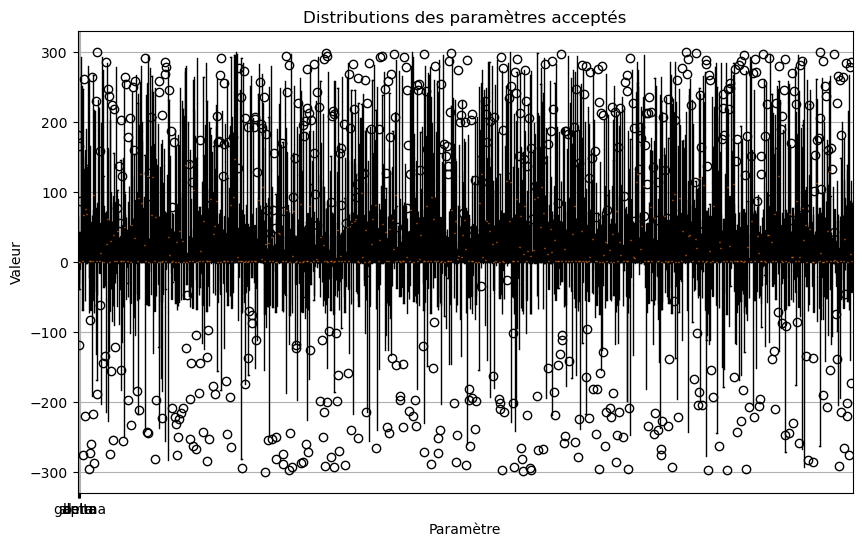

In [34]:
plt.figure(figsize=(10, 6))
plt.boxplot(thetas_acceptes, patch_artist=True)
plt.xlabel('Paramètre')
plt.ylabel('Valeur')
plt.title('Distributions des paramètres acceptés')
plt.xticks([1, 2, 3, 4], ['alpha', 'beta', 'gamma', 'delta'])
plt.grid(True)
plt.show()